In [131]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
#df2=pd.read_csv('C:/Users/belky/column_2C_weka.csv')
df3=pd.read_csv('/home/cristian/Descargas/huesos y esas vainas/column_3C_weka.csv')

In [133]:
#df2.head()

In [134]:
df3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Los dataset son los mismos, solo que en df2, hay dos anomalías. Estas se unifican en df3.

In [135]:
df3.info()
df=df3.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


# I

El nombre de las columnas que tenemos es:

0. Incidencia Pélvica (IP)
1. Inclinación Pélvica (AP)
2. Ángulo Lordosis Lumbar (ALL)
3. Pendiente Sacra (PS)
4. Radio Pélvico (RP)
5. Grado de Espondilolistesis (GE)
6. Clase

Ahora, las vamos a cambiar por sus siglas:

In [136]:
df.rename(columns={'pelvic_incidence':'IP','pelvic_tilt':'AP','lumbar_lordosis_angle':'ALL','sacral_slope':'PS','pelvic_radius':'RP',
                      'degree_spondylolisthesis':'GE'},inplace=True)

Quedando así...

In [137]:
df.head()

,IP,AP,ALL,PS,RP,GE,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


# II

Vamos a ver cómo se distribuyen los datos frente a la '_clases_':

<Axes: ylabel='class'>

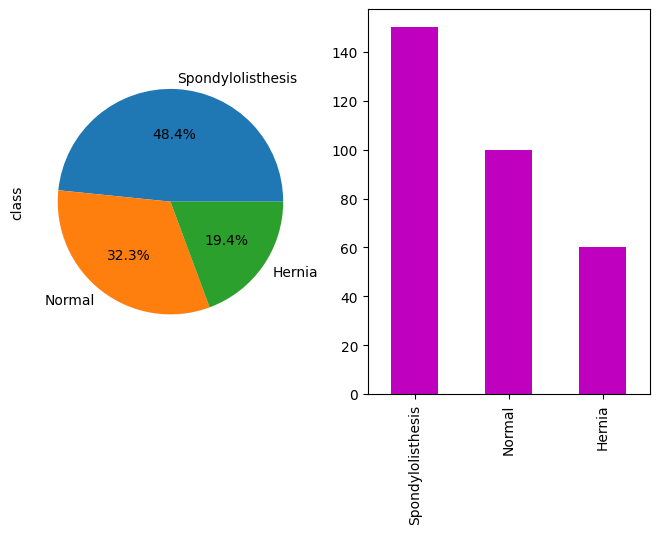

In [139]:
graf, mallas=plt.subplots(nrows=1,ncols=2, figsize=(8,5))

df['class'].value_counts().plot(kind="bar",color='m',ax=mallas[1])
df['class'].value_counts().plot.pie(autopct="%1.1f%%",ax=mallas[0])

Como se ve, casi la mitad de los datos son de personas que tienen Espondilolistesis (más de 140). Y el 19% de los datos son de personas que tienen Hernias (60 personas).

# III
Vamos a ver cómo es la distribución de las demás variables: se hace histogramas a las variables, y se les aplica un KDE.

In [140]:
import seaborn as sns

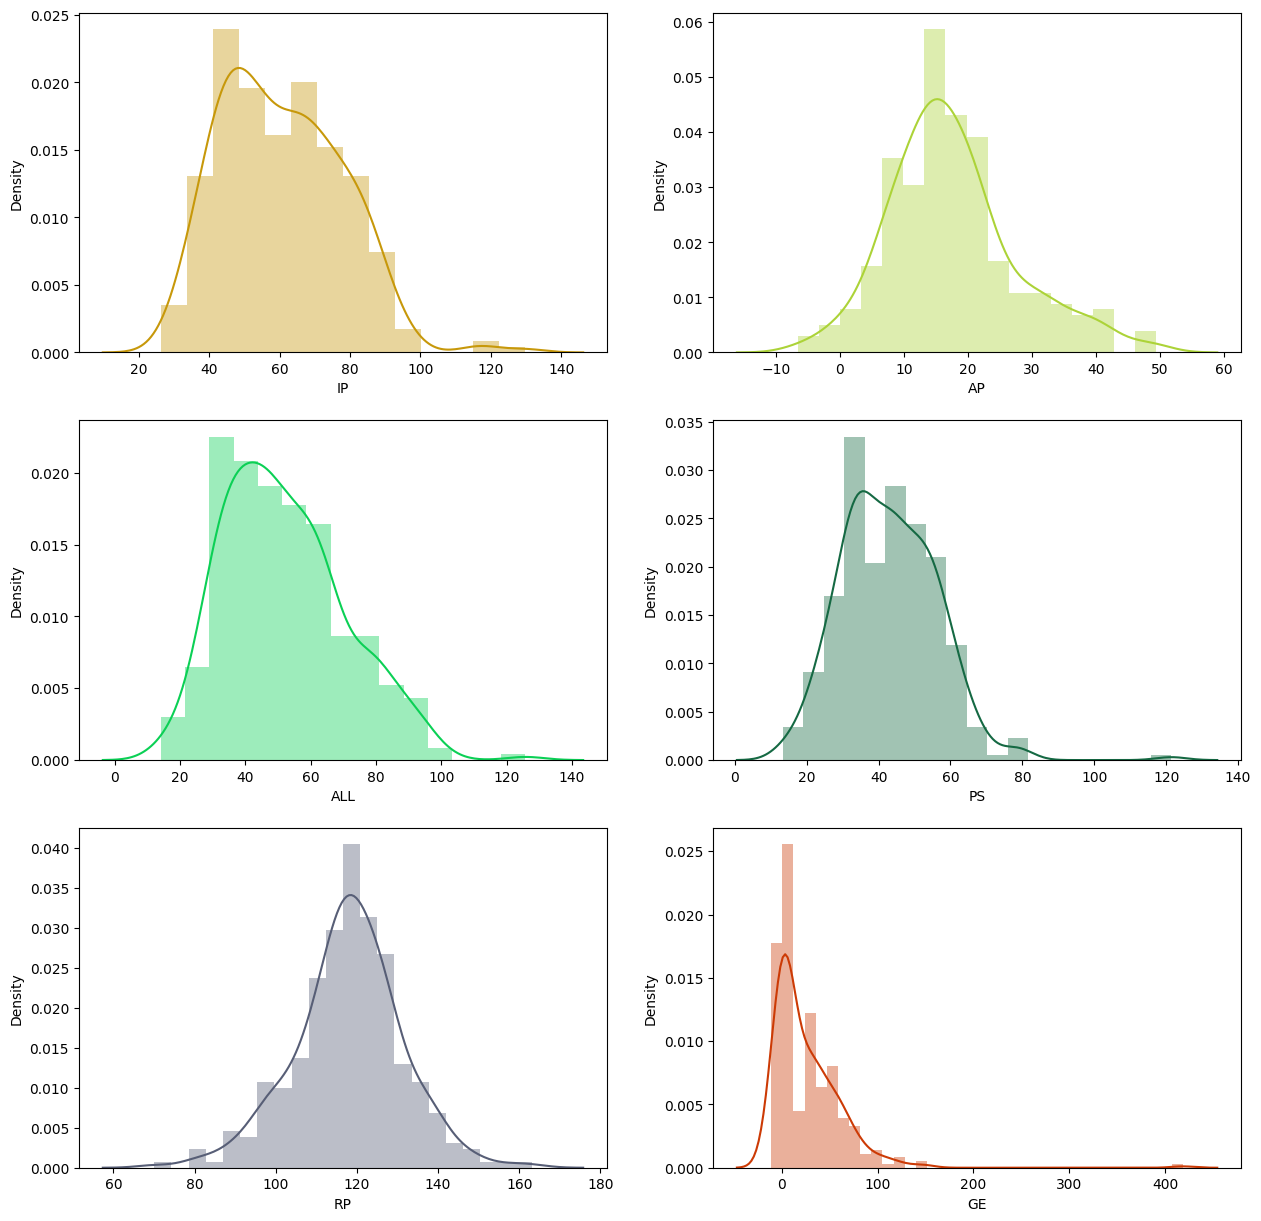

In [141]:
graf, malla=plt.subplots(nrows=3,ncols=2,figsize=(15,15)) 
malla=malla.flatten()
columnas=df.drop('class',axis=1).columns.values

for i, columnas in enumerate(columnas):
    color=['#C7980A', '#F4651F', '#82D8A7', '#CC3A05', '#575E76', '#156943', '#0BD055', '#ACD338']
    #print(columnas,i)
    sns.distplot(df[columnas],color=color[-i],ax=malla[i])


¿Qué se puede apreciar a partir de las gráficas de KDE?

1. Que 120 es el valor predominante en el readio pélvico, y que los demás valores casi que se distribuyen como una gaussiana al rededor de ese punto.
2. Que el grado de Espondiolitesis toma un valor predominante mayor a cero.

# IV
Vamos a ver cómo se distribuyen las categorías, según la variables '_class_':

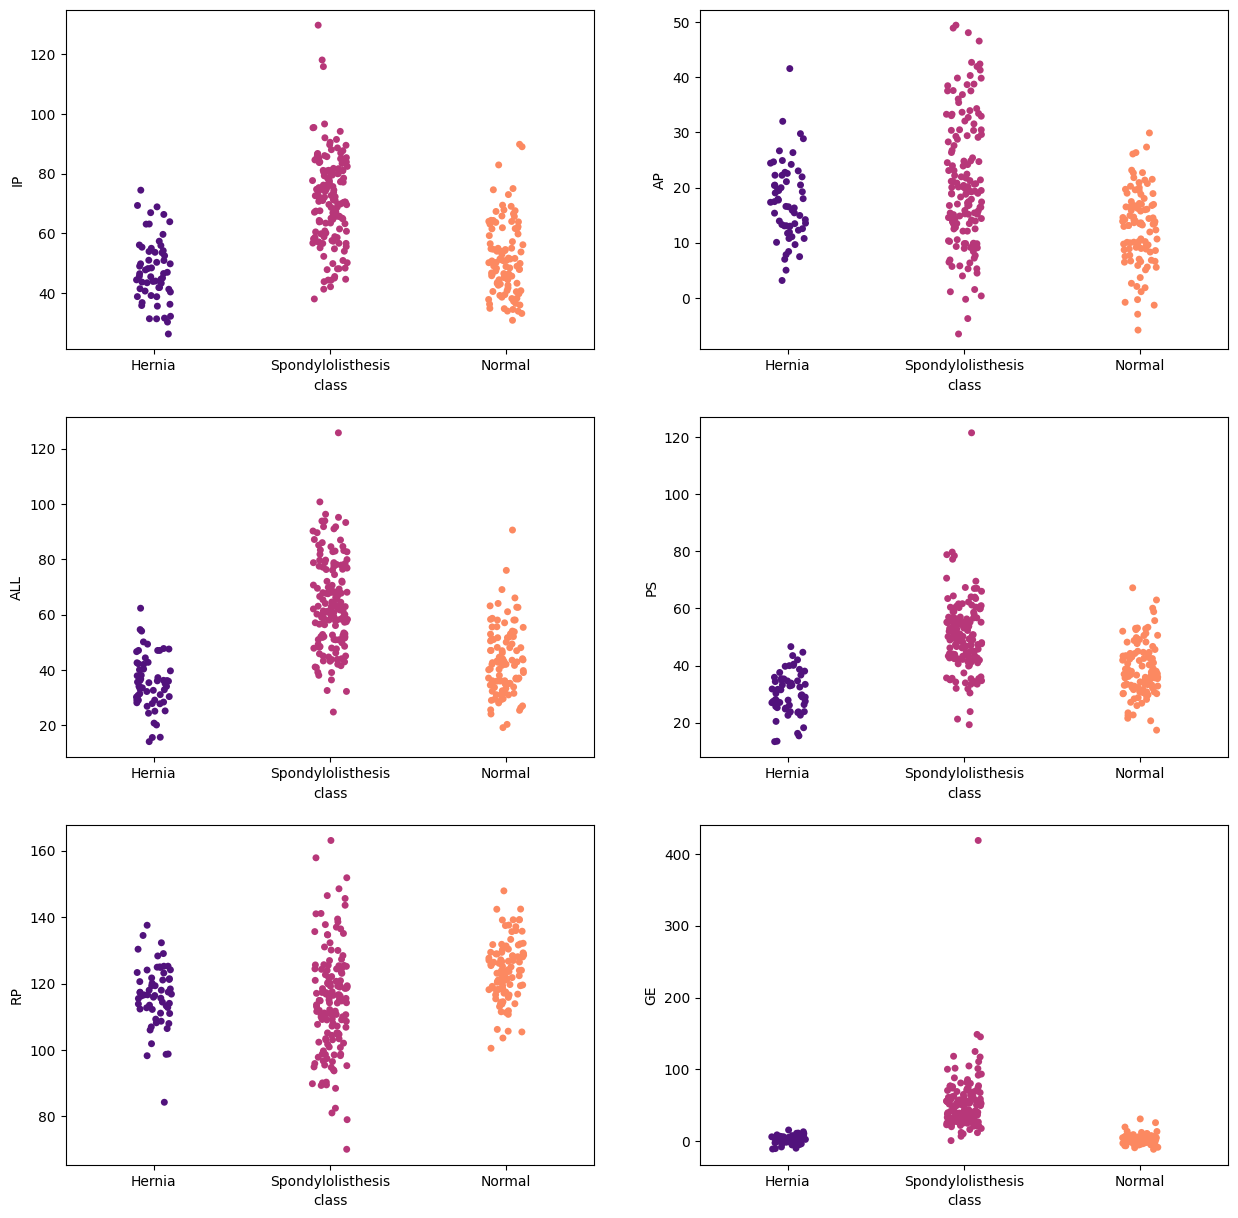

In [142]:
graf, malla=plt.subplots(nrows=3,ncols=2,figsize=(15,15)) 
malla=malla.flatten()

columnas=df.drop('class',axis=1).columns.values

for i in range(len(columnas)):
    sns.stripplot(x = "class", y = columnas[i],ax=malla[i] ,data = df, palette="magma")

# V
Vamos a ver las estadísticas de los datos.

In [143]:
df.describe()

,IP,AP,ALL,PS,RP,GE
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Para tener mejor idea, vamos a hacer gráficos de diagramas de caja. Y ver como es el comportamiento de cada clase, con determinada característica.


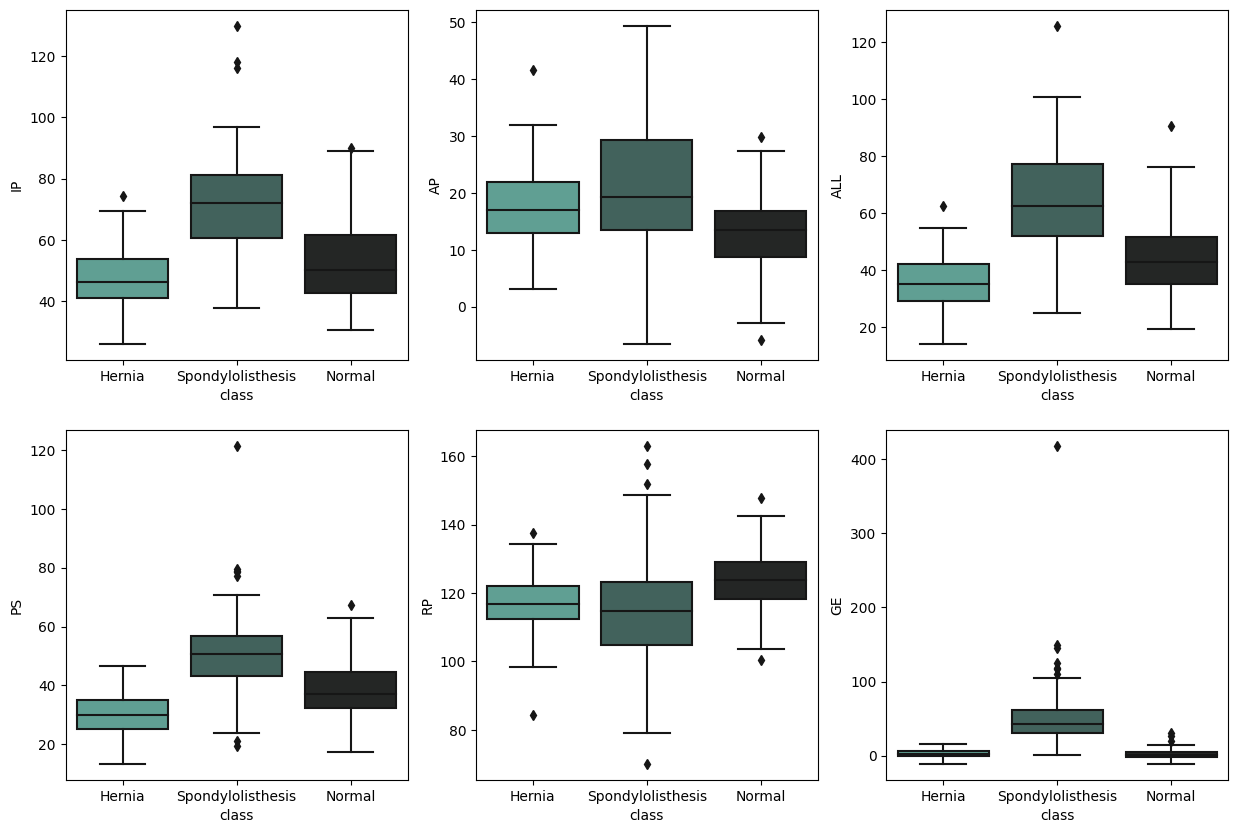

In [144]:
graf, malla=plt.subplots(nrows=2,ncols=3,figsize=(15,10)) 
malla=malla.flatten()
columnas

for i in range (len(columnas)):
    sns.boxplot(x='class', y=columnas[i], ax=malla[i],data=df,palette='dark:#5A9_r')

Como vemos, los datos se comportan relativamente bien. Ellos no tienen tanto sesgo. Pero la clase **Espondilolistesis** es quien tiene más outliers. 

**¿Cómo trataremos ese outlier?**

Ya que ellos se comportan bien, y no tienen una cantidad significativa de outliers, lo que se hará se solo cambiar los que estén más alejados. Y se cambiaran por el promedio de los datos.


## Outliers para GE

<Axes: xlabel='class', ylabel='GE'>

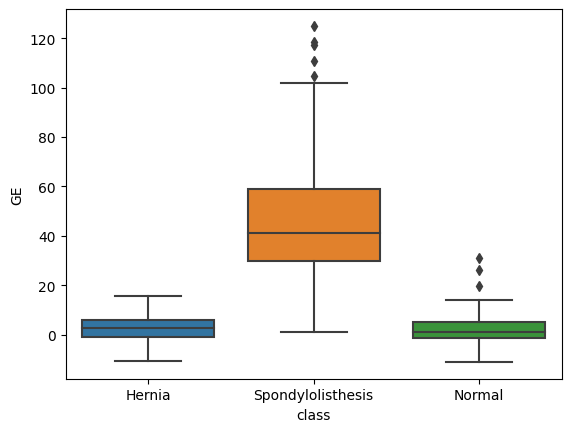

In [145]:
for i in range (310):
    if df['GE'][i]>140:
        #print(df['GE'][i])
        df['GE'][i]=df['GE'].mean()
        #print(df['GE'][i])
sns.boxplot(x='class', y=df['GE'], data=df)

## Outliers para PS

<Axes: xlabel='class', ylabel='PS'>

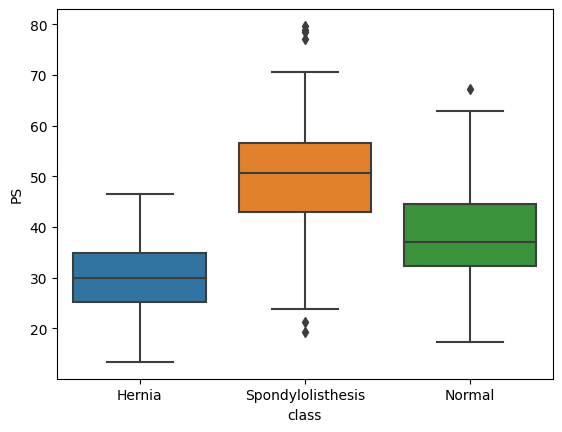

In [146]:
for i in range (310):
    if df['PS'][i]>100:
        df['PS'][i]=df['PS'].mean()
        
sns.boxplot(x='class', y=df['PS'], data=df)

## Outliers para IP

<Axes: xlabel='class', ylabel='IP'>

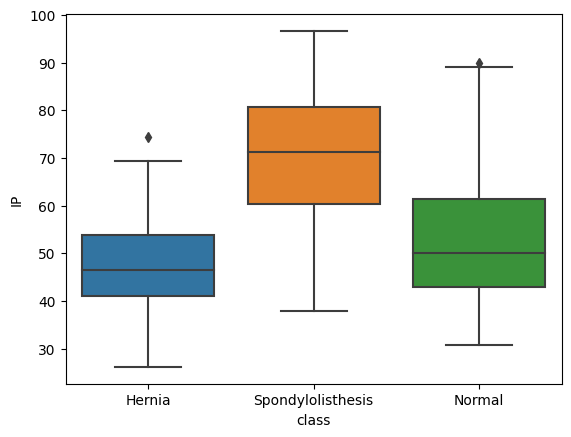

In [147]:
for i in range (310):
    if df['IP'][i]>100:
        df['IP'][i]=df['IP'].mean()
        
sns.boxplot(x='class', y=df['IP'], data=df)

## ¿Cómo quedaron los datos ahora?

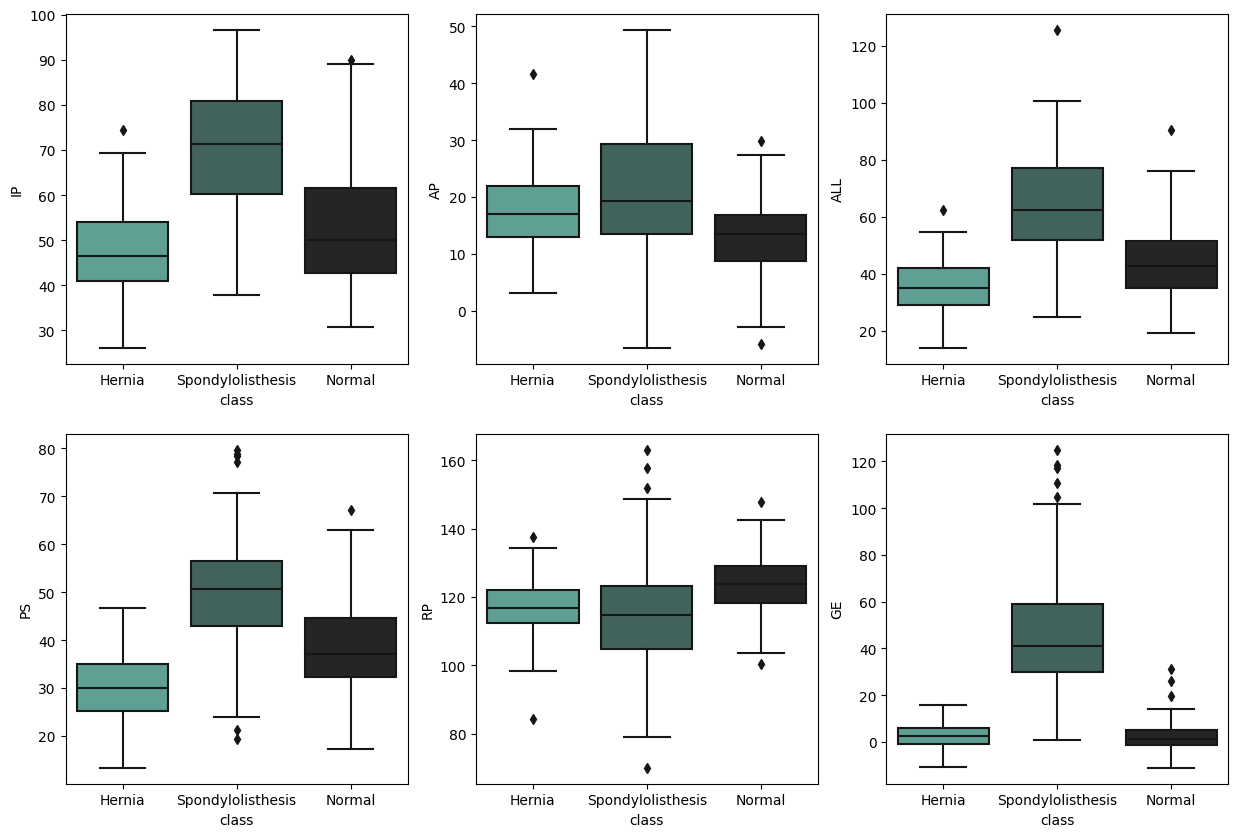

In [148]:
graf, malla=plt.subplots(nrows=2,ncols=3,figsize=(15,10)) 
malla=malla.flatten()
columnas

for i in range (len(columnas)):
    sns.boxplot(x='class', y=columnas[i], ax=malla[i],data=df,palette='dark:#5A9_r')

# VI

## Miremos la correlación entre las variables

<Axes: >

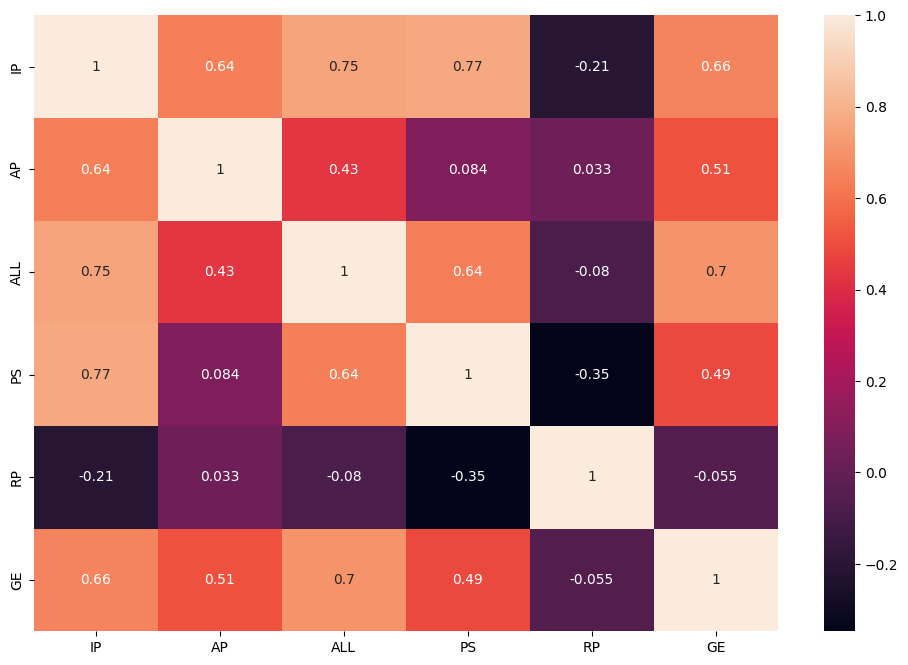

In [149]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Podemos codificar (con one-hot) la variable categórica, clase. Y ver cómo es la correlación de dicha variable con cada una de las afectaciones: la Hernia, el  Espondilolistesis.

In [150]:
d=df.copy()

In [151]:
dummies = pd.get_dummies(d['class'], drop_first = False)
dummies.head(-10)

,Hernia,Normal,Spondylolisthesis
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
295,0,1,0
296,0,1,0
297,0,1,0
298,0,1,0


In [152]:
# Añadimos las variables binarias al DataFrame
d = pd.concat([d, dummies], axis = 1)

# Eliminamos la vairable original race
d = d.drop(columns=['class'])
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IP                 310 non-null    float64
 1   AP                 310 non-null    float64
 2   ALL                310 non-null    float64
 3   PS                 310 non-null    float64
 4   RP                 310 non-null    float64
 5   GE                 310 non-null    float64
 6   Hernia             310 non-null    uint8  
 7   Normal             310 non-null    uint8  
 8   Spondylolisthesis  310 non-null    uint8  
dtypes: float64(6), uint8(3)
memory usage: 15.6 KB


Ahora sí podemos ver cómo es que se relacionan las variables con c/afectación:

<Axes: >

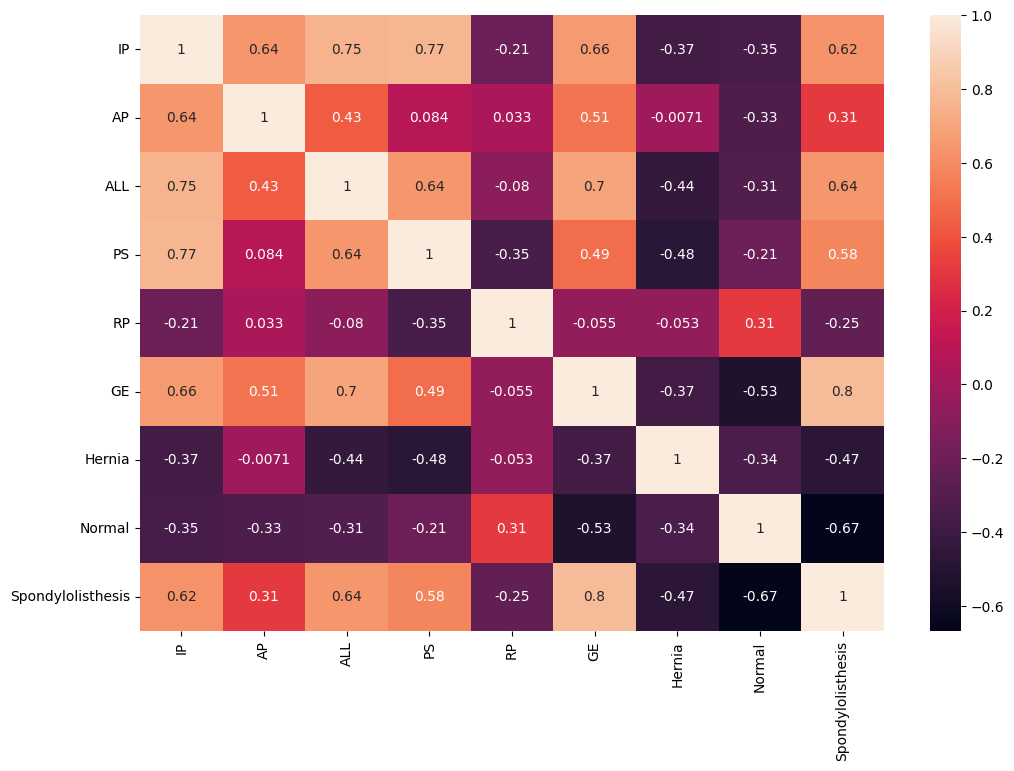

In [153]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(d.corr(),annot=True)

Entonces, se tienen tres base de datos: 
1. **df2:** Tiene unidas las afectaciones en una sola, entonces las subclases de _class_  no son: Normal, Hernia y Espondilolistesis, como en df3; sino que son: Normal y Anormal.
2. **df:** Es la base de datos que tiene el EDA, de la df3.
3. **d:** Es la df, pero con la codificación one-hot de las subclases de _class_

In [154]:
df=pd.read_csv("/home/cristian/Descargas/huesos y esas vainas/column_3C_weka.csv")

In [155]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [156]:
df["class"].info
pd.value_counts(df['class'])

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

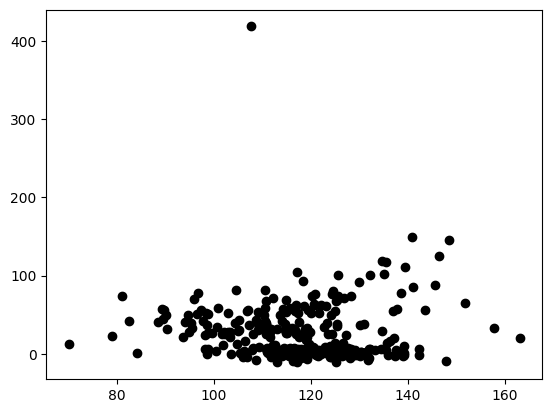

In [157]:
import matplotlib.pyplot as plt 

plt.scatter(x = df["pelvic_radius"],y = df["degree_spondylolisthesis"],color = "black")
x = df["pelvic_radius"]
y = df["degree_spondylolisthesis"]

In [158]:
pd.value_counts(df['class'])

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

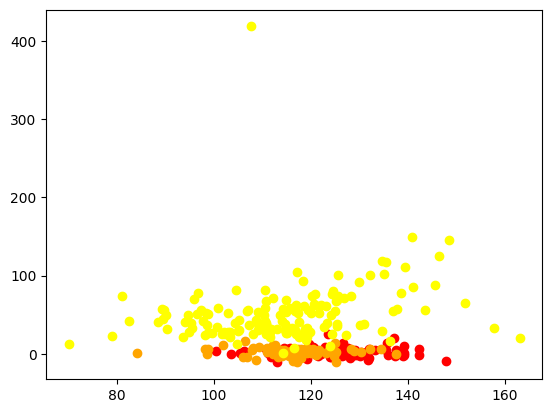

In [159]:
plt.scatter(x = df[df["class"] == "Normal"].pelvic_radius , y = df[df["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df[df["class"] == "Hernia"].pelvic_radius , y = df[df["class"] == "Hernia"].degree_spondylolisthesis,color = "orange")
plt.scatter(x = df[df["class"] == "Spondylolisthesis"].pelvic_radius , y = df[df["class"] == "Spondylolisthesis"].degree_spondylolisthesis,color = "yellow")

A tener en cuenta:

El espondilolistesis es una condición médica en la cual una vértebra se desplaza hacia adelante sobre la vértebra inferior.

Una hernia de disco es una afección médica que ocurre cuando el material blando del núcleo pulposo en el interior del disco intervertebral se desplaza a través de una fisura o ruptura en el anillo fibroso exterior que lo rodea.

La clase normal, se refiere a las hernias comunes y corrrientes. 

Entonces, se pueden unir clase clases Hernia normal y Hernia de disco, de tal manera que podamos identificar entre una hernia y espondilolistesis

In [160]:
df["class"]=df["class"].replace("Normal","Hernia")

In [161]:
pd.value_counts(df['class'])

Hernia               160
Spondylolisthesis    150
Name: class, dtype: int64

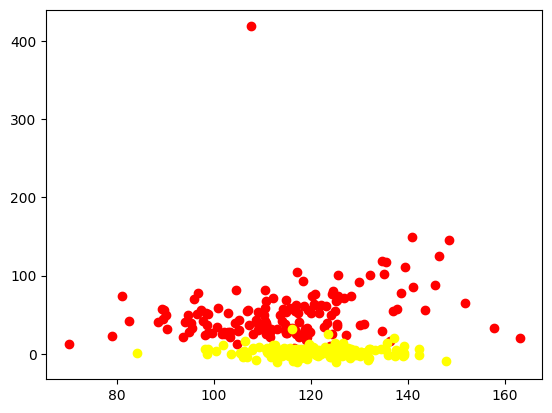

In [162]:
plt.scatter(x = df[df["class"] == "Spondylolisthesis"].pelvic_radius , y = df[df["class"] == "Spondylolisthesis"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df[df["class"] == "Hernia"].pelvic_radius , y = df[df["class"] == "Hernia"].degree_spondylolisthesis,color = "yellow")

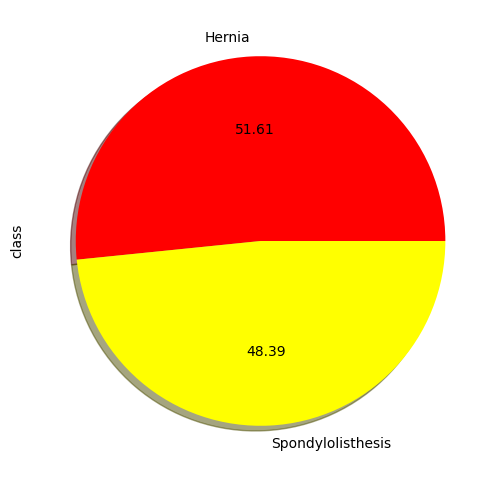

In [163]:
colors=('red','yellow')
df['class'].value_counts().plot(kind='pie',shadow=True,colors=colors,autopct='%.2f',figsize=(6,6))
plt.show()

Las clases no presentan un desvalanceo significante

Se puede nota que las caracteristicas estan fuertemente correlacionadas 

In [164]:
pd.value_counts(df['class'])

Hernia               160
Spondylolisthesis    150
Name: class, dtype: int64

las clases estan distrinuidas de una manera que se asemeja a una distribucion lineal 

# primer metodo MeanShift

In [165]:
df1=df.copy()

In [166]:
from sklearn.cluster import MeanShift, estimate_bandwidth

se organiza un dataset para entrenar el modelo

In [167]:
cluster_data_Aux = {"x":x,"y":y}
datac = pd.DataFrame(cluster_data_Aux)

In [168]:
bandwidth = estimate_bandwidth(datac)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)

In [169]:
clusters = ms.fit_predict(datac)
df1["label"] = clusters

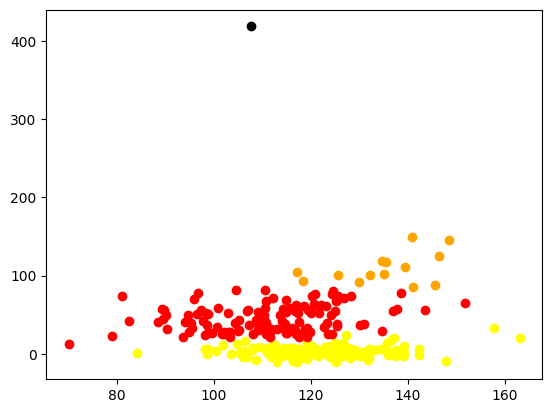

In [170]:
plt.scatter(x = df1[df1.label == 0].pelvic_radius,y = df1[df1.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df1[df1.label == 1].pelvic_radius,y = df1[df1.label == 1].degree_spondylolisthesis , color = "red")
plt.scatter(x = df1[df1.label == 2].pelvic_radius,y = df1[df1.label == 2].degree_spondylolisthesis , color = "orange")
plt.scatter(x = df1[df1.label == 3].pelvic_radius,y = df1[df1.label == 3].degree_spondylolisthesis , color = "black")

In [171]:
pd.value_counts(df1['label'])

0    167
1    128
2     14
3      1
Name: label, dtype: int64

# segundo metodo DBSCN

In [172]:
df2=df.copy()
datacc=datac.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

In [173]:
from sklearn.cluster import DBSCAN

In [174]:
cluster = DBSCAN(eps=0.5, min_samples=4)
cluster.fit(datacc)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 2 clusters and 18 points of noise.


In [175]:
clusters = cluster.fit_predict(datacc)
df2["label"] = clusters

In [176]:
pd.value_counts(df2['label'])

 0    285
-1     18
 1      7
Name: label, dtype: int64

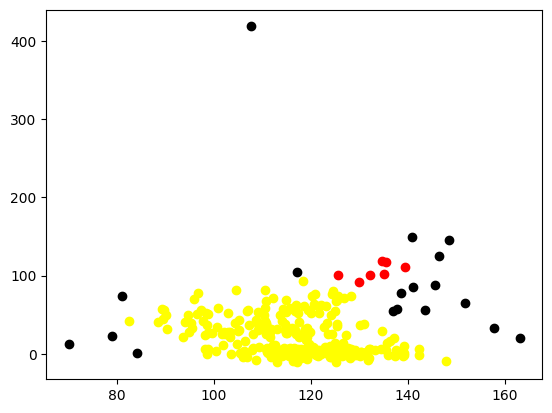

In [177]:
plt.scatter(x = df2[df2.label == -1].pelvic_radius,y = df2[df2.label == -1].degree_spondylolisthesis , color = "black")
plt.scatter(x = df2[df2.label == 0].pelvic_radius,y = df2[df2.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df2[df2.label == 1].pelvic_radius,y = df2[df2.label == 1].degree_spondylolisthesis , color = "red")

In [178]:
pd.value_counts(df2['label'])

 0    285
-1     18
 1      7
Name: label, dtype: int64

# tercer metodo K-Means 

In [179]:
df3=df.copy()

In [180]:
from sklearn.cluster import KMeans

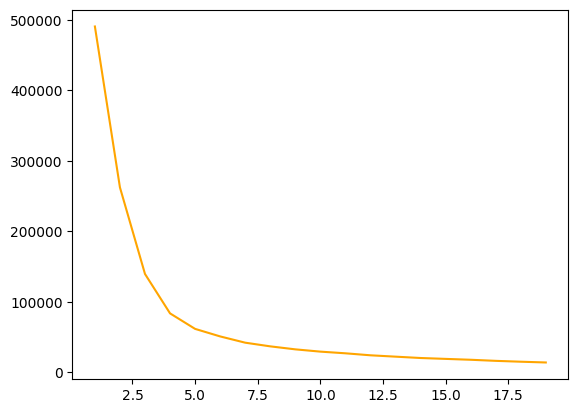

In [181]:
cont = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(datac)
    cont.append(kmeans.inertia_)
plt.plot(range(1,20),cont,color="orange")
plt.show()

In [182]:
kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(datac)
df3["label"] = clusters

In [183]:
dfn=df.copy()
dfn["class"] = [1 if each == "Hernia " else 0 for each in dfn["class"]]
df_class = dfn["class"]
predict_class = df3["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(df_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(df_class - predict_class)*100))

accuracy is : 76.7741935483871


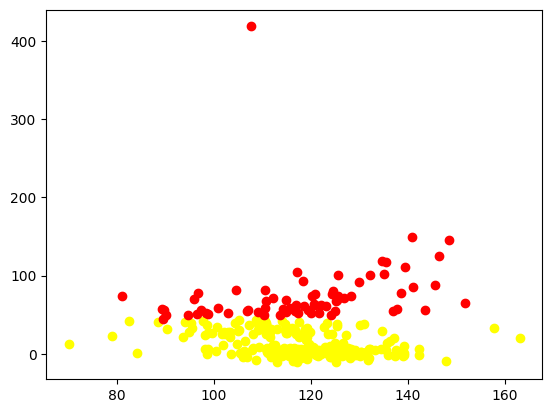

In [184]:
plt.scatter(x = df3[df3.label == 0].pelvic_radius,y = df3[df3.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df3[df3.label == 1].pelvic_radius,y = df3[df3.label == 1].degree_spondylolisthesis , color = "red")

In [185]:
pd.value_counts(df3['label'])

0    238
1     72
Name: label, dtype: int64

# Cuarto metodo Hierarcihal Clustering

In [186]:
df4=df.copy()

In [187]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

linkage: El criterio de vinculación determina qué distancia usar entre conjuntos de observación.

ward: minimiza la varianza de los grupos que se fusionan

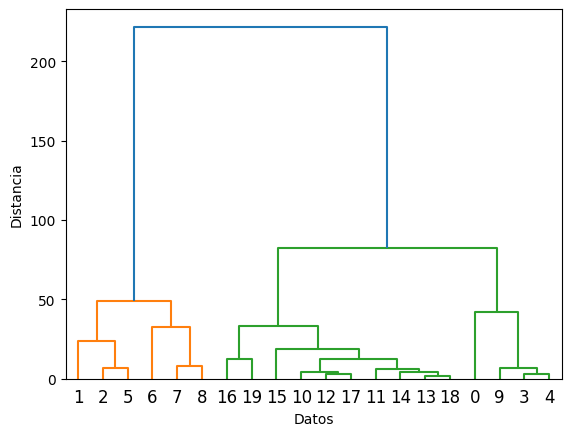

In [188]:
merg = linkage(datac.iloc[200:220,:],method="ward")
dendrogram(merg)
plt.xlabel("Datos")
plt.ylabel("Distancia")
plt.show()

In [189]:
Hcluster = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = Hcluster.fit_predict(datac)

df4["label"] = cluster

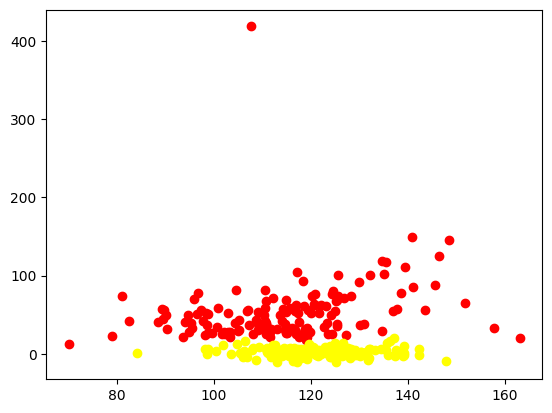

In [190]:
plt.scatter(x = df4[df4.label == 0].pelvic_radius,y = df4[df4.label == 0].degree_spondylolisthesis , color = "red")
plt.scatter(x = df4[df4.label == 1].pelvic_radius,y = df4[df4.label == 1].degree_spondylolisthesis , color = "yellow")

Ahora vamos a organizar el dataset para visualizar los cluster

In [191]:
pd.value_counts(df4['label'])

1    163
0    147
Name: label, dtype: int64

In [192]:
dfn=df.copy()
dfn["class"] = [0 if each == "Spondylolisthesis" else 1 for each in dfn["class"]]

In [193]:
df_class = dfn["class"]
predict_class = df4["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(df_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(df_class - predict_class)*100))

accuracy is : 97.74193548387096


# Comparativo 

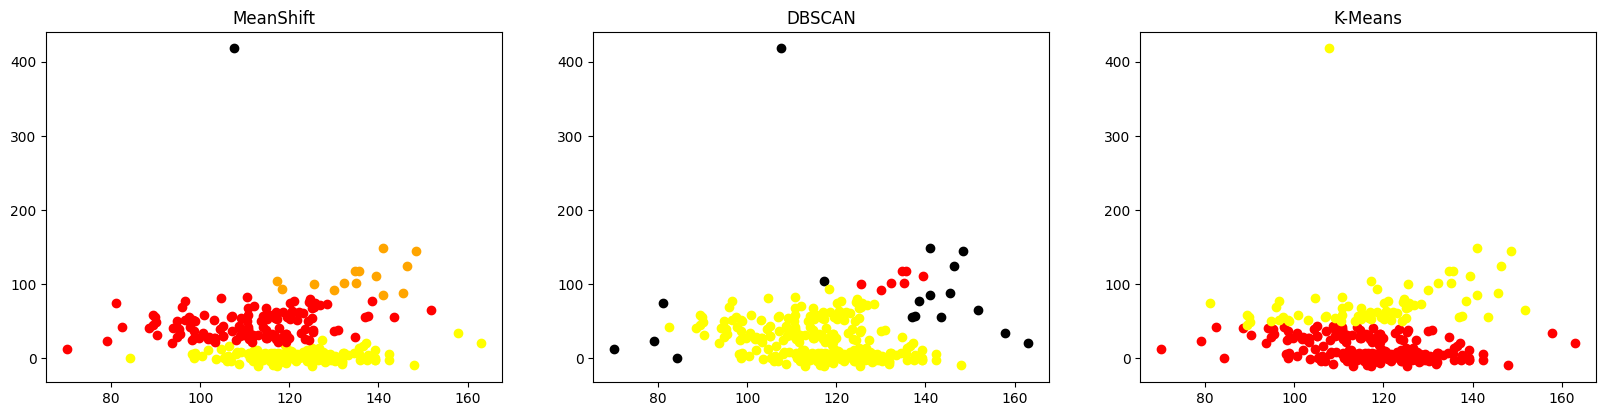

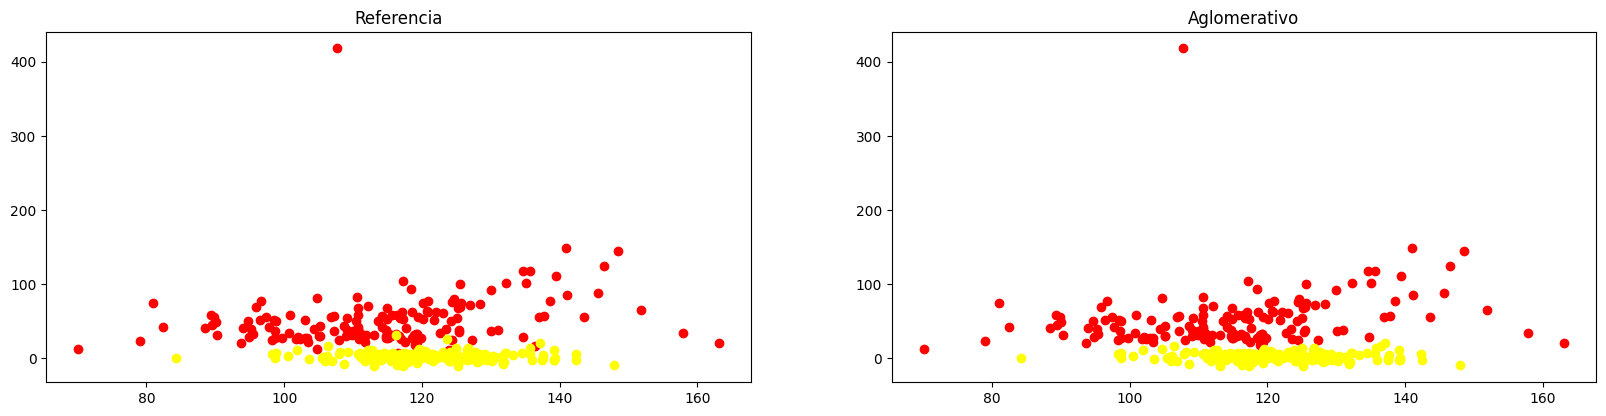

In [194]:
#We compare our model in graph
fig = plt.figure(figsize = (20,10))

plt.subplot(2, 3, 3)
plt.scatter(x = df3[df3.label == 0].pelvic_radius,y = df3[df3.label == 0].degree_spondylolisthesis , color = "red")
plt.scatter(x = df3[df3.label == 1].pelvic_radius,y = df3[df3.label == 1].degree_spondylolisthesis , color = "yellow")
plt.title("K-Means")

plt.subplot(2, 3, 1)
plt.scatter(x = df1[df1.label == 0].pelvic_radius,y = df1[df1.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df1[df1.label == 1].pelvic_radius,y = df1[df1.label == 1].degree_spondylolisthesis , color = "red")
plt.scatter(x = df1[df1.label == 2].pelvic_radius,y = df1[df1.label == 2].degree_spondylolisthesis , color = "orange")
plt.scatter(x = df1[df1.label == 3].pelvic_radius,y = df1[df1.label == 3].degree_spondylolisthesis , color = "black")
plt.title("MeanShift") 

plt.subplot(2, 3, 2)
plt.scatter(x = df2[df2.label == -1].pelvic_radius,y = df2[df2.label == -1].degree_spondylolisthesis , color = "black")
plt.scatter(x = df2[df2.label == 0].pelvic_radius,y = df2[df2.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df2[df2.label == 1].pelvic_radius,y = df2[df2.label == 1].degree_spondylolisthesis , color = "red")
plt.title("DBSCAN")
plt.show()

fig = plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1)
plt.scatter(x = df[df["class"] == "Spondylolisthesis"].pelvic_radius , y = df[df["class"] == "Spondylolisthesis"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df[df["class"] == "Hernia"].pelvic_radius , y = df[df["class"] == "Hernia"].degree_spondylolisthesis,color = "yellow")
plt.title("Referencia")

plt.subplot(2, 2, 2)
plt.scatter(x = df4[df4.label == 0].pelvic_radius,y = df4[df4.label == 0].degree_spondylolisthesis , color = "red")
plt.scatter(x = df4[df4.label == 1].pelvic_radius,y = df4[df4.label == 1].degree_spondylolisthesis , color = "yellow")
plt.title("Aglomerativo") 

plt.show()

In [195]:
df4=df4.drop(["degree_spondylolisthesis"], axis=1)

Ahora vamos a ver las matricas de error para el Aglomerativo:

In [196]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [197]:

print(classification_report(df_class,predict_class))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.97      0.99      0.98       160

    accuracy                           0.98       310
   macro avg       0.98      0.98      0.98       310
weighted avg       0.98      0.98      0.98       310



<Axes: >

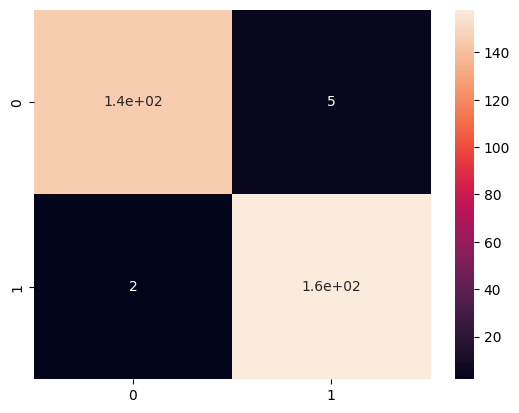

In [198]:
sns.heatmap(confusion_matrix(df_class, predict_class),annot=True)

In [199]:
df4=df4.rename(columns={"label":"Cluster", "pelvic_incidence":"incidencia pélvica", "pelvic_tilt":"inclinación pélvica", "lumbar_lordosis_angle":"ángulo de lordosis lumbar", "sacral_slope":"pendiente sacra", "pelvic_radius":"radio pélvico" })

In [200]:
df4["Cluster"]=df4["Cluster"].replace(0,"Spondylolisthesis")
df4["Cluster"]=df4["Cluster"].replace(1,"Hernia")
df4.groupby('Cluster').mean().sort_values(by=["radio pélvico"], ascending=False)

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico
Cluster,,,,,
Hernia,50.677028,14.754555,40.931361,35.922473,121.065144
Spondylolisthesis,71.385080,20.634574,64.127730,50.750507,114.433909
